# Section: EDA

## <font color='#4073FF'>Project Solution: Bank Churn Analysis</font>

###  <font color='#14AAF5'>IDENTIFY AND VISUALIZE WHICH FACTORS CONTRIBUTE TO CUSTOMER CHURN</font>

###  <font color='#14AAF5'> Exploratory Data Analytics / Root Cause Analytics</font>

**Customer churn is an important metric to track because lost customers equal lost revenue. If a company loses enough customers, it can have a serious impact. Customer churn is important because it’s more expensive to acquire a new customer than to sell more to an existing client. In fact, this is one metric that can make or break a business: If you do a better job keeping customers around, you should see your average customer lifetime value increase, making every future sale even more valuable and ultimately improving your unit margins.**

### **Dataset**:

The dataset consists of 14 columns as follows.

1. 'RowNumber' - Record No.
2. 'CustomerId' - Unique ID of Customer.
3. 'Surname' - Last name of user.
4. 'CreditScore' -It is the numerical representation of a customer's creditworthiness. Credit score ranges vary based on   the credit scoring model used, but are generally similar to the following:

        - 300-579: Poor
        - 580-669: Fair
        - 670-739: Good
        - 740-799: Very good
        - 800-850: Excellent
5. 'Geography' - Geography to where customer belongs.
6. 'Gender'- Gender of the customer. 
7. 'Age' - Age of customer.
8. 'Tenure' - Number of years the client was affiliated with the bank.
9. 'Balance' - Amount in a particular cuatomer's account.
10. 'NumOfProducts'- Number of products brought.
11. 'HasCrCard' - Does the customer have credit card?
12. 'IsActiveMember' - Is the customer an active member?
13. 'EstimatedSalary' - Estimated salary of customer.
14. 'Exited' - Did a customer exited? or stayed?

## Steps to be performed

1. Domain Exploration

    - Understand the relevant business process, business impact
    - Common challenges and beleifs
    - Sources of data and external factors
    
    
2. Data Collection and Data Exploration

    - Collect data from multiple units of business, prepare the dataset
    - Perform a generic exploration on data to identify common challenges in data quality
    
    
3. Data Cleaning
    - Handling duplicates, unwanted columns, missing values, outliers
    
    
4. EDA / RCA
    
   - Data Visualization
    
        - Univariate Analysis
        
        - Bivariate Analysis
        
        - Multivariate Analysis
        
   - Statistical methods
   
        - Correlation Analysis

## 2. Data Collection and Data Exploration

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [2]:
#Load data
df = pd.read_csv(r"Bank_churn_modelling.csv")

In [3]:
# Shape of data
df.shape

(10000, 14)

### General information on the dataset

In [4]:
# Viewing the Dataset
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# Information on Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# Looking at Unique Values for geography
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [7]:
# Looking at Unique Values for Gender
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [8]:
# Descriptive Statistics
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


##### Observations
    - atleast 25% of the customers have balance=0 in their account

## 3. Data Cleaning

In [9]:
# check for duplicate entries
df.duplicated().sum()

0

In [10]:
# check for unwanted columns
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Columns CustomerID, RowNumber, Surname are of no significance as they do not contribute to customer churn. Hence we can drop them.

In [11]:
# dropping unwanted columns
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
# check for missing values
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
# check for skewness
df.skew()

C:\Users\shrut\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

### 3. Exploratory Data Analytics
### Data Visualization

### Univariate Analysis


- try to explore one variable at a time individually and explore the distribution
- Categorical data - Discrete Frequency Distribution - countplot
- Numeric Data - Continuous Frequency Distribution - histogram

In [14]:
# Columns in dataset
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

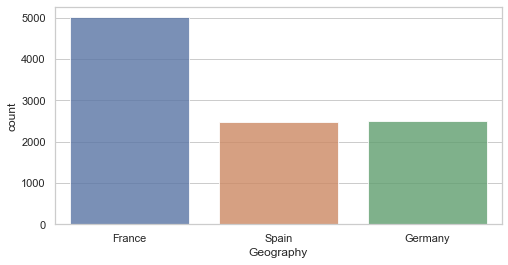

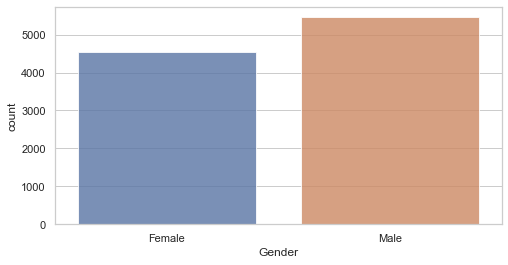

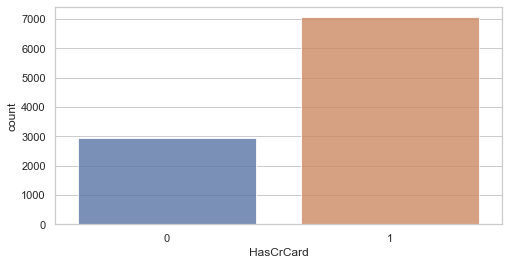

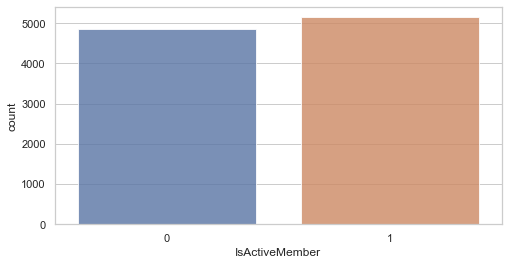

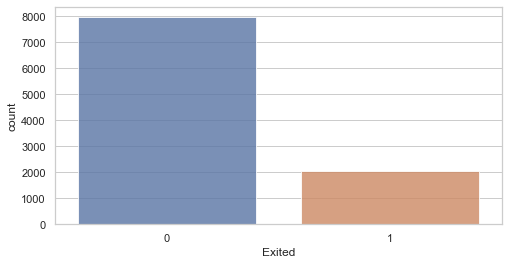

In [15]:
# Visualizing Categorical Data using countplot
cats = ['Geography', 'Gender',  'HasCrCard', 'IsActiveMember', 'Exited']
for column in cats:
    plt.figure(figsize=(8,4))
    sns.countplot(x=df[column],alpha=0.8)
   
plt.show()

#### Observations - 
    - Almost 50% of customers are from France, rest from Spain and germany
    - males customers are slightly higher compared to female customers
    - approx 70% of customers have credit card
    - almost 50% of customers are not using back accounts actively,
    - approx 20% of customers left the bank
    

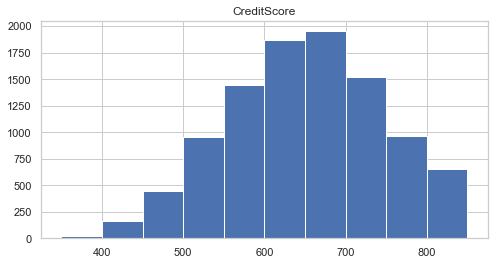

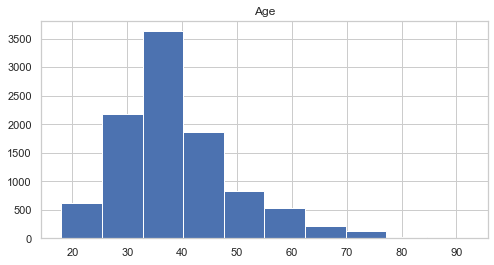

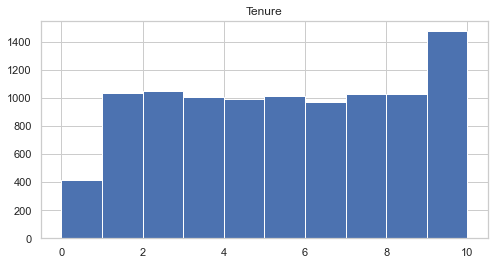

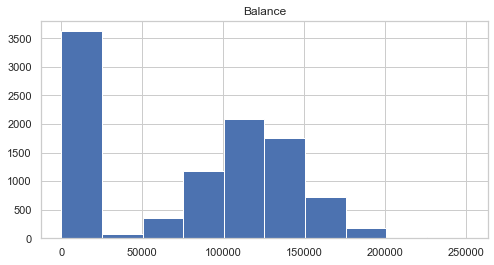

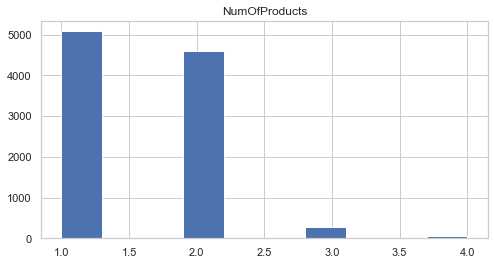

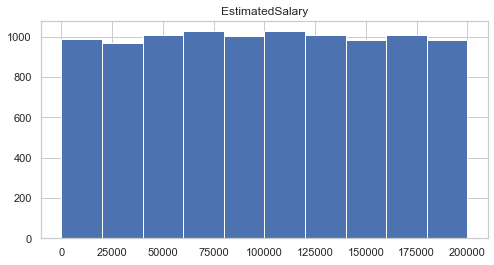

In [16]:
# Visualizing Numeric data using histogram
nums = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
for column in nums:
    plt.figure(figsize=(8,4))
    plt.hist(df[column])
    plt.title(column)
    plt.show()

#### Observations - 
    - most of the customers have creditscore between 500 to 800
    - most of the customers have age between 25 to 50, there are some outliers
    - Tenure has almost a uniform distribution
    - there are two groups of customers, one having 0 balance, others having 75k to 175k
    - most of customers have 1 or 2 products
    - Salary has almost a uniform distribution 

### Bivariate Analysis

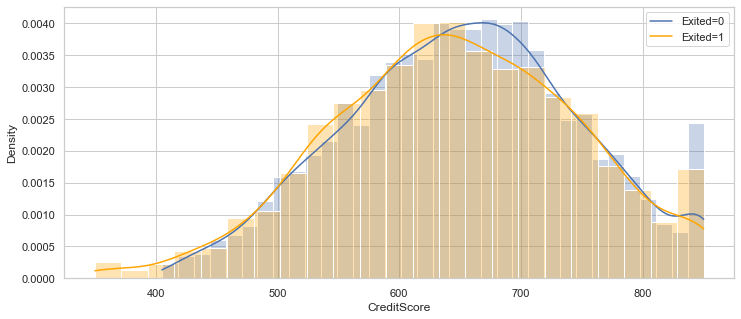

In [17]:
# Visualization numeric v/s categorical - probability density distribution -- distplot(Use seaborns histplot)

# creditscore v/s exited
plt.figure(figsize=(12,5))
sns.histplot(df['CreditScore'][df.Exited==0],kde=True,stat='density',alpha=0.3)
sns.histplot(df['CreditScore'][df.Exited==1],kde=True,stat='density',color='orange',alpha=0.3)
plt.legend(['Exited=0','Exited=1'])
plt.show()

##### Observations
- As both the distributions, for Exited=0 and Exited=1 for creditscore are almost overlapping each other, that means, at each value of creditscore density of customers leaving is equal to the density of customers not leaving the bank. thus we can say that, creditscore has no information to answer why customers left the bank

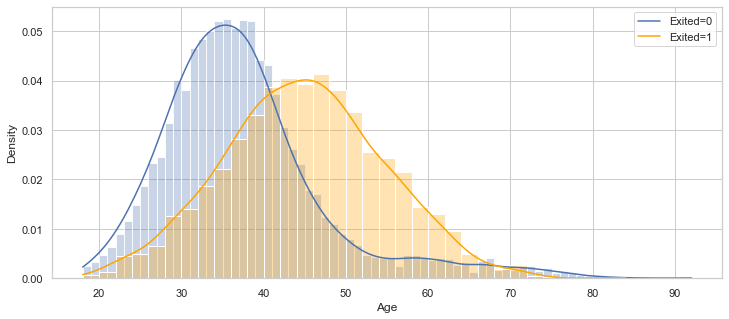

In [18]:
# Age v/s exited
plt.figure(figsize=(12,5))
sns.histplot(df['Age'][df.Exited==0],color='b',kde=True,stat="density",alpha=0.3)
sns.histplot(df['Age'][df.Exited==1],kde=True,color='orange',stat="density",alpha=0.3)
plt.legend(['Exited=0','Exited=1'])
plt.show()

#### Observations - 
- For distribution Exited =0 is higher in the age group of 20 to 40 where as the distribution of exited=1 is highers in age groups of 40 to 70, that means most of young age customers did not leave the bank and high age customers left the bank

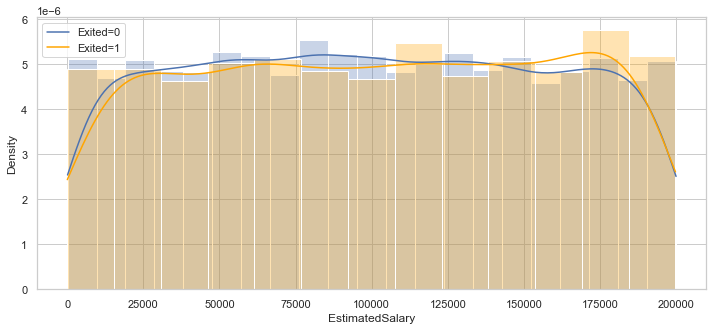

In [19]:
# EstimatedSalary v/s exited
plt.figure(figsize=(12,5))
sns.histplot(df['EstimatedSalary'][df.Exited==0],kde=True,stat='density',color='b',alpha=0.3)
sns.histplot(df['EstimatedSalary'][df.Exited==1],kde=True,stat='density',color='orange',alpha=0.3)
plt.legend(['Exited=0','Exited=1'])
plt.show()

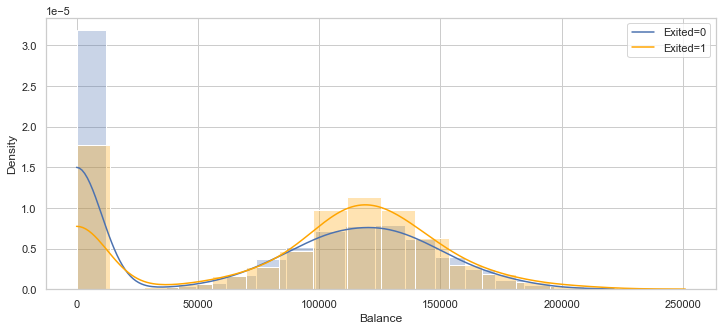

In [20]:
# Balance v/s exited
plt.figure(figsize=(12,5))
sns.histplot(df['Balance'][df.Exited==0],color='b',kde=True,stat="density",alpha=0.3)
sns.histplot(df['Balance'][df.Exited==1],color='orange',kde=True,stat="density",alpha=0.3)
plt.legend(['Exited=0','Exited=1'])
plt.show()

### Observations - 

We can divide customers into two groups, with one group having 0 balance in their account and others having a  balance in between 50000 and 200000. 
    

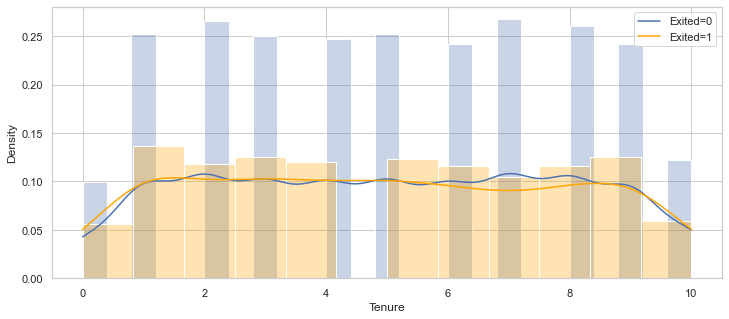

In [21]:
# Tenure v/s exited
plt.figure(figsize=(12,5))
sns.histplot(df['Tenure'][df.Exited==0],color='b',kde=True,stat="density",alpha=0.3)
sns.histplot(df['Tenure'][df.Exited==1],color='orange',kde=True,stat="density",alpha=0.3)
plt.legend(['Exited=0','Exited=1'])
plt.show()

#### Important features = Age, Balance

In [22]:
# categorical v/s categorical cross table creation

# Geography v/s Exited
pivot = pd.crosstab(df.Geography,df.Exited,margins=True)
pivot

Exited,0,1,All
Geography,,,
France,4204,810,5014
Germany,1695,814,2509
Spain,2064,413,2477
All,7963,2037,10000


In [23]:
# Portion of cutomers from each country who exited
ratio = pivot[1]/pivot['All']
ratio

Geography
France     0.161548
Germany    0.324432
Spain      0.166734
All        0.203700
dtype: float64

<AxesSubplot:xlabel='Geography'>

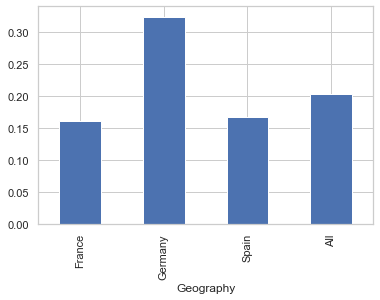

In [24]:
# Plotting the data collected in previous cell
ratio.plot(kind='bar')

32% of customers who exited are from Germany.

In [25]:
# Gender v/s Exited contribution to Exited ratio

pivot = pd.crosstab(df.Gender,df.Exited,margins=True)
ratio = pivot[1]/pivot['All']
ratio

Gender
Female    0.250715
Male      0.164559
All       0.203700
dtype: float64

<AxesSubplot:xlabel='Gender'>

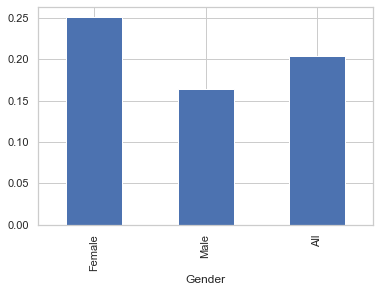

In [26]:
ratio.plot(kind='bar')

25% of cutomers who exited are females.

**important features - Geography, Gender**

### Multivariate Analysis

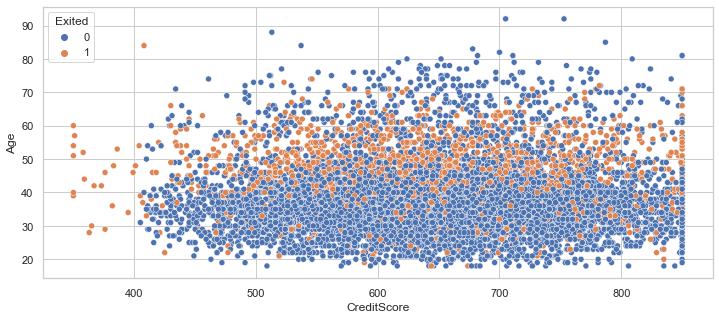

In [27]:
# numeric v/s numeric v/s categorical - scatterplot

# Age v/s Creditscore v/s Exited
plt.figure(figsize=(12,5))
sns.scatterplot(x='CreditScore',y='Age',hue="Exited",data=df)
plt.show()

**Customers having age between 40 to 70 are leaving,
customers with creditscore less than 400 are leaving**

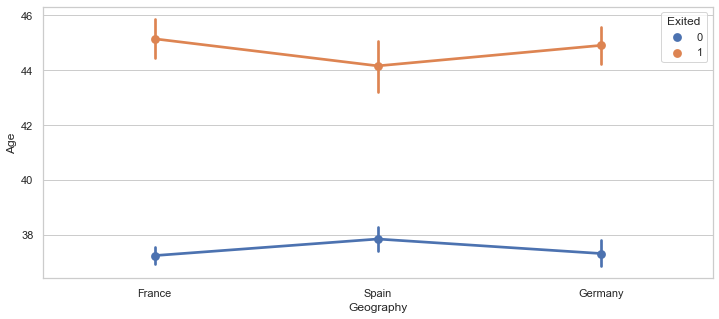

In [28]:
# Categorical v/s categorical v/s numeric = boxplot/pointplot/swarmplot

# Geography v/s Exited v/s Age
plt.figure(figsize=(12,5))
sns.pointplot(x='Geography',y='Age',hue='Exited',data=df)
plt.show()

### Statistical Methods

#### Correlation analysis

In [29]:
# Finding correlation between variables
cor = df.corr()
cor

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


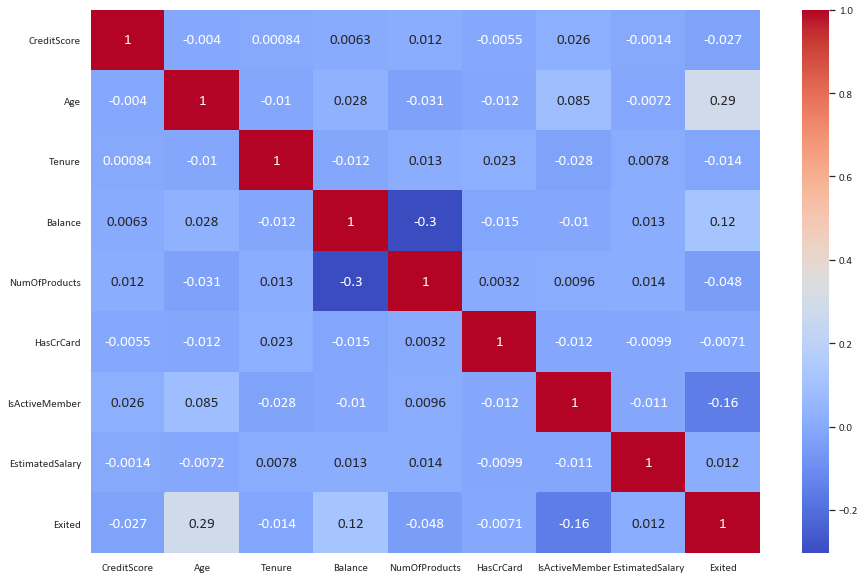

In [30]:
font = {"size":15,'family':'calibri'}
import matplotlib
matplotlib.rc('font',**font)
plt.figure(figsize=(15,10))

# Plotting the correlation matrix
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

    if corr(x,y) is between -0.1 to +0.1 = bad correlation

    if corr(x,y) is between +0.1 to +0.5 = good correlation
    if corr(x,y) is between -0.1 to -0.5 = good correlation

    if corr(x,y) > +0.5 = Very good correlation
    if corr(x,y) < -0.5 = Very good correlation

### END OF EDA